In [4]:
# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# Loading data
df = pd.read_csv('../data/processed/processed.csv')
print(f"Data shape: {df.shape}")

df.head()

Data shape: (700, 16)


,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,0.0,32370.0,16185.0,16185.0,2014-01-01,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,0.0,26420.0,13210.0,13210.0,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,0.0,32670.0,21780.0,10890.0,2014-01-06,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,0.0,13320.0,8880.0,4440.0,2014-01-06,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,0.0,37050.0,24700.0,12350.0,2014-01-06,6,June,2014


In [5]:
# Extracting month from date for seasonality

df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

# Select features for the model

# Target variable (what we want to predict)
y = df['Units Sold']

# Feature columns (what we'll use to predict)

numeric_features = ['Sale Price', 'Manufacturing Price', 'Discounts', 'Month']
categorical_features = ['Product', 'Segment', 'Country', 'Discount Band']

print(f"Target variable shape: {y.shape}")
print(f"Numeric features: {numeric_features}")
print(f"Categorical features: {categorical_features}")

Target variable shape: (700,)
Numeric features: ['Sale Price', 'Manufacturing Price', 'Discounts', 'Month']
Categorical features: ['Product', 'Segment', 'Country', 'Discount Band']


In [6]:
# Creating a copy to avoid modifying original
df_model = df.copy()

df_encoded = pd.get_dummies(df_model[categorical_features], drop_first=True)

# Combining numeric and encoded categorical features
X_numeric = df_model[numeric_features]
X = pd.concat([X_numeric, df_encoded], axis=1)

print(f"Features shape: {X.shape}")
print(f"Number of features: {X.shape[1]}")
print(f"\nFirst few feature names:")
print(X.columns.tolist()[:10])

Features shape: (700, 20)
Number of features: 20

First few feature names:
['Sale Price', 'Manufacturing Price', 'Discounts', 'Month', 'Product_ Carretera ', 'Product_ Montana ', 'Product_ Paseo ', 'Product_ VTT ', 'Product_ Velo ', 'Segment_Enterprise']


In [9]:
# Split: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,      # 20% for testing
    random_state=42     # Makes results reproducible
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Features: {X_train.shape[1]} features")

Training set: 560 samples
Test set: 140 samples
Features: 20 features


In [10]:
# Creating the model
model = LinearRegression()

# Training
model.fit(X_train, y_train)

print("Model trained successfully!")
print(f"Model coefficients shape: {model.coef_.shape}")

Model trained successfully!
Model coefficients shape: (20,)


In [11]:
# Predicting on test set

y_pred = model.predict(X_test)

# Show first 10 predictions vs actual for comparision
comparison = pd.DataFrame({
    'Actual': y_test[:10].values,
    'Predicted': y_pred[:10],
    'Difference': y_test[:10].values - y_pred[:10]
})

print(comparison)

   Actual    Predicted  Difference
0   689.0   919.705403 -230.705403
1  1005.0  1257.821416 -252.821416
2  1366.0  1597.019068 -231.019068
3  2434.5  1598.324322  836.175678
4  1582.0  1580.501802    1.498198
5  1778.0  1697.564683   80.435317
6  2342.0  1399.662223  942.337777
7  1530.0  1522.525748    7.474252
8  1679.0  1455.219657  223.780343
9  1372.0  1425.661084  -53.661084


In [12]:
# Calculating metrics

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("="*50)
print("MODEL PERFORMANCE METRICS")
print("="*50)
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f} units")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} units")
print("="*50)
print(f"\nInterpretation:")
print(f"- On average, predictions are off by {mae:.0f} units")
print(f"- R² of {r2:.4f} means the model explains {r2*100:.1f}% of variance")

MODEL PERFORMANCE METRICS
R² Score: 0.1850
Mean Absolute Error (MAE): 610.04 units
Root Mean Squared Error (RMSE): 764.34 units

Interpretation:
- On average, predictions are off by 610 units
- R² of 0.1850 means the model explains 18.5% of variance


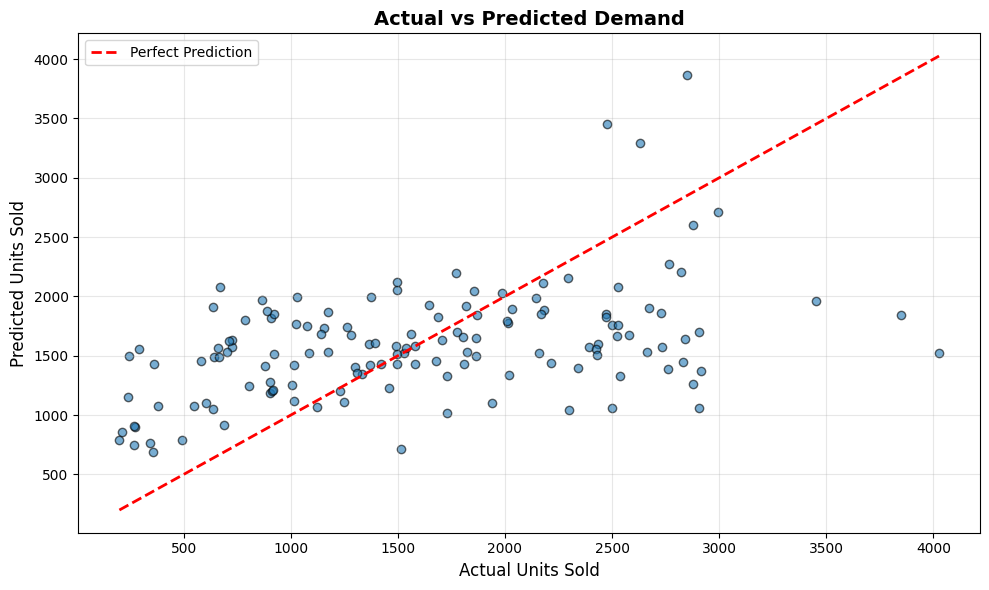

In [13]:
# Scatter plot: Actual vs Predicted (to check our accuracy)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()], 
         'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Units Sold', fontsize=12)
plt.ylabel('Predicted Units Sold', fontsize=12)
plt.title('Actual vs Predicted Demand', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Top 10 Most Important Features:
                             Feature  Coefficient
17               Discount Band_ Low    426.737860
19              Discount Band_ None    410.310984
11                 Segment_Midmarket   250.190399
15                    Country_Mexico  -225.328996
14                   Country_Germany  -222.334658
9                 Segment_Enterprise   193.123591
18            Discount Band_ Medium    162.730292
8                     Product_ Velo   -144.981504
16  Country_United States of America  -143.904359
7                      Product_ VTT    -90.859272


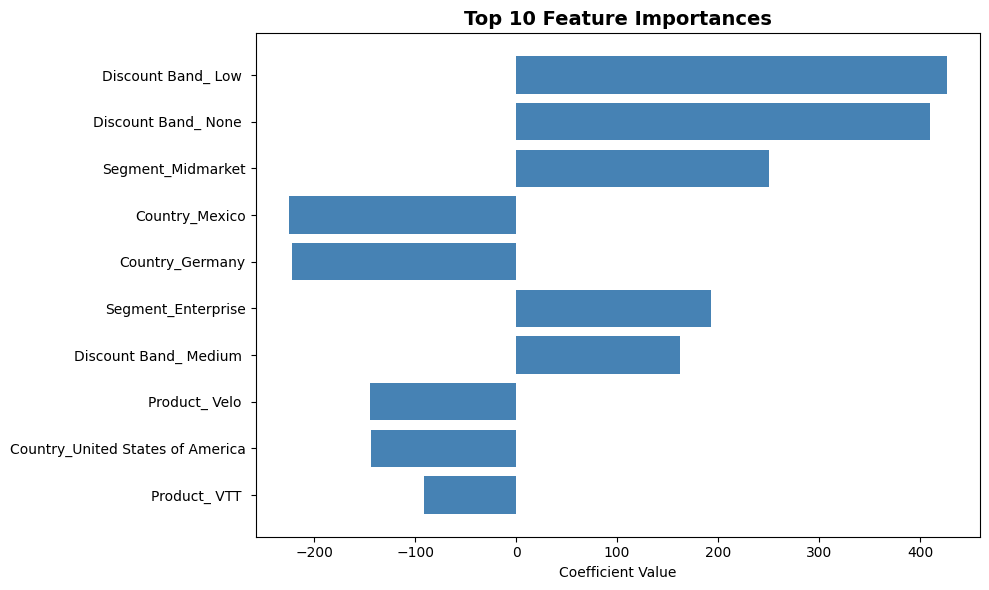

In [14]:
# which features matter most
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

# Visualizing
plt.figure(figsize=(10, 6))
top_features = feature_importance.head(10)
plt.barh(top_features['Feature'], top_features['Coefficient'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Top 10 Feature Importances', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [15]:
import pickle

# Saving the model
with open('../models/demand_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Saving the feature names 
feature_names = X.columns.tolist()
with open('../models/feature_names.pkl', 'wb') as f:
    pickle.dump(feature_names, f)

print("Model saved to models/demand_model.pkl")
print("Feature names saved to models/feature_names.pkl")

Model saved to models/demand_model.pkl
Feature names saved to models/feature_names.pkl
